In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

Goal of this exercise is to implement the embedded Runge-Kutta 3(2) method with variable step size.


For this we use two Runge Kutte methods with same function evaluations but different weights $b_i$


\begin{align*}
y_1 = y_0 + h \sum_{j=1}^{s} b_j Y_j' \\
\hat{y}_1 = y_0 + h \sum_{j=1}^{s} \hat{b}_j Y_j' \\
\end{align*}

where $y_1$ has order 3 and $\hat{y}_1$ has order 2.


#### Runge-Kutta-2 Method

\begin{align*}
y_{n+1} = y_n + hf(t + \frac{h}{2}, y_n + \frac{h}{2}f(t, y_n)) \\
\end{align*}

### Runge-Kutte-3 Method

For the third order method we have

\begin{align*}
k_1 = hf(x0,y0) \\
k_2 = hf(x0 + \frac{h}{2}, y0 + \frac{k_1}{2}) \\
k_3 = hf(x0 + h, y0 + 2k_2 - k_1) \\
y_1 = y_0 + \frac{1}{6}(k_1 + 4k_2 + k_3) \\
\end{align*}



# Algorithm

We consider the differential equation $y' = f(x,y)$, initial value $(x_0,y_0)$ and initial step size $h$ with $h \leq \bar{x} - x_0$.

First we calculate the numerical solution $y_1$ and $\hat{y}_1$ with the methods and

\begin{align*}
est = ||h\sum_{i=1}^{s} d_i Y_i'|| = ||\hat{y}_1 - y_1|| \\
\end{align*}

The we have the following algorithm

```{text}
if est \leq tol then
    x_0 := x_0 + h
    y_0 := y1
    h := min(h_opt, bar_x - x_0)
else
   make step again with h=h_opt

if x_0 = bar_x then stop
```


According to **Beispiel 4.11** we have the following weights

\begin{align*}
b_i = 1/4, 0 , 3/4 \\
\hat{b}_i = 0, 1/2, 1/2 \\
d_i = -1/4, 1/2, -1/4
\end{align*}

More concretely we compute

**Higher order method**

\begin{align*}
y_{n+1} = y_n + h(\frac{1}{4}k_1 + \frac{3}{4}k_3) \\
\end{align*}

**Lower Order Method**

\begin{align*}
\hat{y}_{n+1} = y_n + h(\frac{1}{2}k_2 + \frac{1}{2}k_3) \\
\end{align*}

where the $k$'s are given by

\begin{align*}
k_1 = f(x_n,y_n) \\
k_2 = f(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_1) \\
k_3 = f(x_n + h, y_n-hk_1 + 2k_2) \\
\end{align*}

And $h_opt$ is determined by

\begin{align*}
h_{opt} = 0.9 * h * \sqrt[p]{\frac{tol}{est}} \\
\end{align*}

where $p$ is the order of the method, in our case $p=3$.

which gives us

\begin{align*}
h_{opt} = 0.9 * h * \sqrt[3]{\frac{tol}{est}} \\
\end{align*}

In [11]:
def rk32_stepsize(f,x_span,y0,tol=1e-6,h_min=1e-6,h_max=0.1):
    """
    RK3(2) method with step size control and weights:
    b_i = [1/4, 0 , 3/4]
    b_i_hat = [0, 1/2, 1/2]
    
    and for the error estimate we have
    d_i = [-1/4, 1/2, -1/4]
    """
    x0, x_end = x_span
    x = [x0]
    y = [np.array(y0)]
    h = h_max
    # This is for exercise 2 the history of the step size
    h_history = [h]

    while x[-1] < x_end:
        if x[-1] + h > x_end:
            h = x_end - x[-1]
        
        xn = x[-1]
        yn = y[-1]

        # Determine the k's 
        k1 = f(xn, yn)
        k2 = f(xn + 0.5*h, yn + 0.5*h*k1)
        k3 = f(xn + h , yn-h*k1 + 2*h*k2)

        # Compute both methods
        y1 = yn + h *(0.25*k1 + 0.75*k3) # 3rd Order
        y1_hat = yn + h*(0.5*k2 + 0.5*k3) #2nd Order

        # Make the error estimate
        est = h*np.linalg.norm(-0.25*k1 + 0.5*k2 - 0.25*k3)

        # Step size adjustment
        if est <= tol:
            x.append(xn + h)
            y.append(y1)
            h = min(h_max, 0.9 * h * (tol/est)**(1/3))
            h_history.append(h)
        else:
            # Set h = h_opt
            h = max(h_min, 0.9 * h * (tol/est)**(1/3))
    return np.array(x), np.array(y), np.array(h_history)


    

Lets test this implementation consider the diferential equation

\begin{align*}
y' = -2xy ~y(0) = 1
\end{align*}


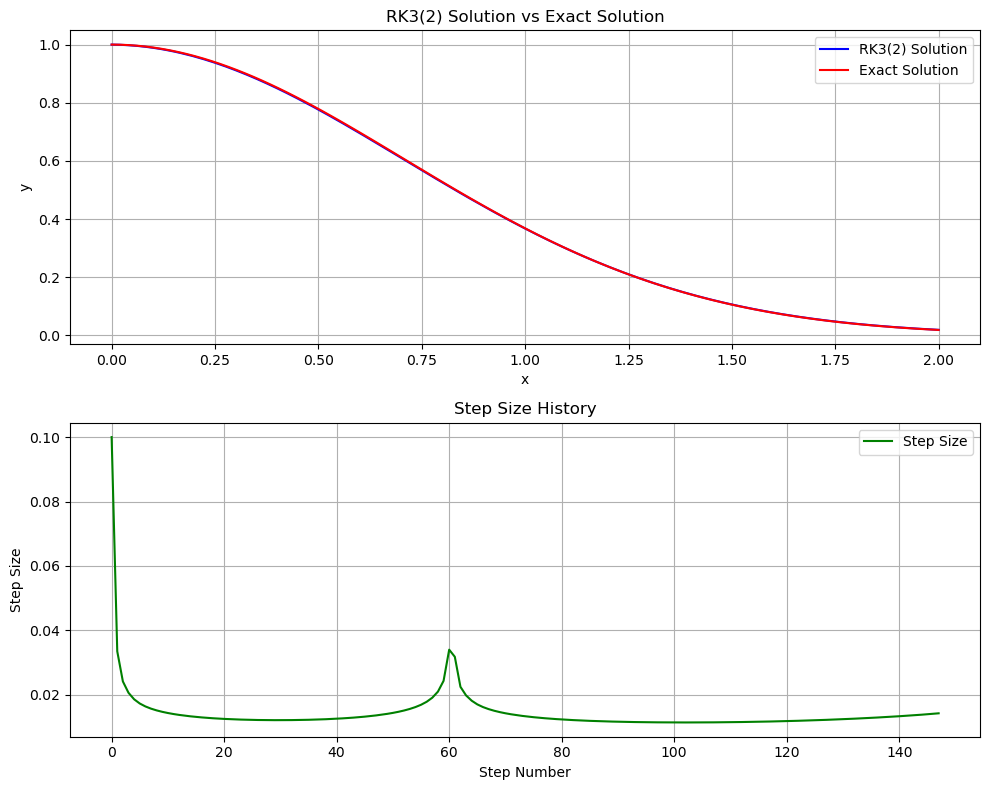

In [12]:
def f(x, y):
    return -2*x*y

def exact_solution(x):
    return np.exp(-x**2)

x,y, h_history = rk32_stepsize(f, (0,2),[1])

x_exact = np.linspace(0, 2, 100)
y_exact = exact_solution(x_exact)
# make subplots with solution and step size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(x, y, label='RK3(2) Solution', color='blue')
ax1.plot(x_exact, y_exact, label='Exact Solution', color='red')
ax1.set_title('RK3(2) Solution vs Exact Solution')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid()
ax2.plot(h_history, label='Step Size', color='green')
ax2.set_title('Step Size History')
ax2.set_xlabel('Step Number')
ax2.set_ylabel('Step Size')
ax2.legend()
ax2.grid()
plt.tight_layout()
plt.show()


# Exercise 2

With the Implementation of Exercise 1 we now solve the Van der Pol equation

\begin{align*}
y'' - \lambda(1-y^2)y' + y = 0 \\
y(0) = 2 \\
y'(0) = 0
\end{align*}

for $\lambda = 0$ and $\lambda =12$

## Rewrite as First order system

For this let $v = y'$ then

\begin{align*}
y' = v \\
v' = \lambda(1-y^2)v - y
\end{align*}

Define $u=[y,v]$ and $f(x,u) = [x,\lambda(1-y^2)v - y]$

## Lamdas $\lambda = 0, 12$

In the Case $\lambda = 0$ we have the ODE

\begin{align*}
y'' + y = 0 \\
y(0) = 2 \\
y'(0) = 0
\end{align*}

Which is just a harmonic oscillator with solution

\begin{align*}
y(t) = 2cos(t) \\
\end{align*}



In [19]:
def van_der_pol(x,u,lam):
    """
    Implementation of the van der Pol equation
    """  
    y, v = u 
    return np.array([v, lam*(1-y**2)*v - y])

# Parameters
x_span = (0, 50) # simulate up to x=20
u0 = [2.0, 0.0] # initial conditions
tol = 1e-4 # tolerance for adaptive step size

# solve for lambda = 0
x0,y0,h0 = rk32_stepsize(lambda x,u: van_der_pol(x,u,0), x_span, u0, tol)

# solve for lambda = 12
x1,y1,h1 = rk32_stepsize(lambda x,u: van_der_pol(x,u,30), x_span, u0, tol)





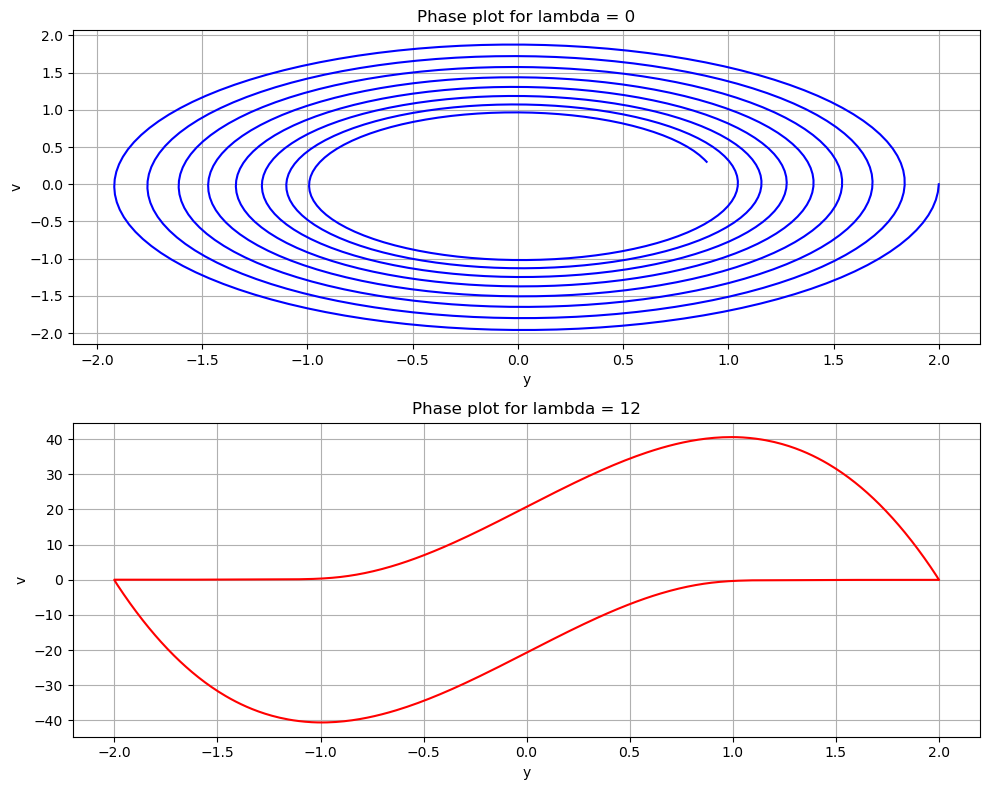

In [20]:
# Now we make a phase plot with y vs v = y' 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# lambda = 0 harmonic oscillator should be circle in phase space
ax1.plot(y0[:,0], y0[:,1], label='lambda = 0', color='blue')
ax1.set_xlabel('y'); ax1.set_ylabel('v'), ax1.set_title('Phase plot for lambda = 0')
ax1.grid()

# lambda = 12 van der Pol oscillator
ax2.plot(y1[:,0], y1[:,1], label='lambda = 12', color='red')
ax2.set_xlabel('y'); ax2.set_ylabel('v'), ax2.set_title('Phase plot for lambda = 12')
ax2.grid()
plt.tight_layout()
plt.show()

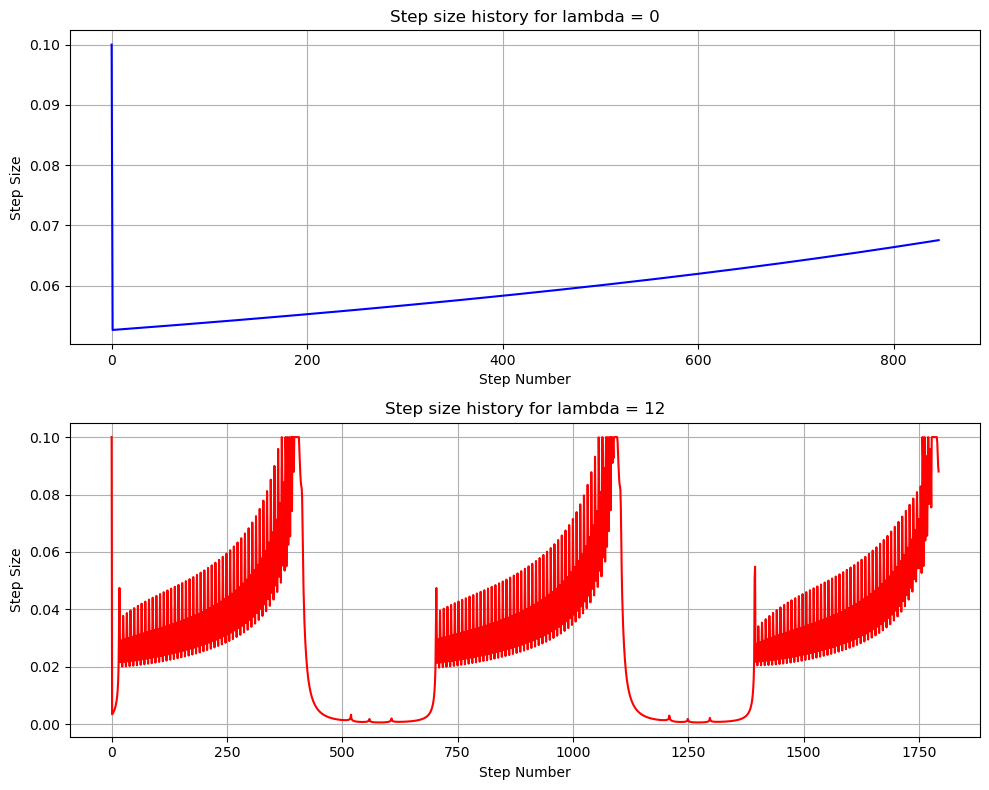

In [15]:
# make plots for h
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# lambda = 0    
ax1.plot(h0, label='lambda = 0', color='blue')
ax1.set_xlabel('Step Number'); ax1.set_ylabel('Step Size'), ax1.set_title('Step size history for lambda = 0')
ax1.grid()
# lambda = 12
ax2.plot(h1, label='lambda = 12', color='red')
ax2.set_xlabel('Step Number'); ax2.set_ylabel('Step Size'), ax2.set_title('Step size history for lambda = 12')
ax2.grid()
plt.tight_layout()
plt.show()

# Exercise 3

We have to check that a Runge Kutta-Method of order $p$ fullfills the following conditions

\begin{align*}
b^T A^l 1 = \frac{1}{(l+1)!}
\end{align*}

for $0 \leq l \leq p-1$ and


In [16]:
import numpy as np
import math

def verify_butcher_conditions(A, b, method_name, max_order):
    """Verify Butcher conditions for any Runge-Kutta method."""
    s = len(b)
    ones = np.ones(s)
    
    print(f"\n{method_name} (Order {max_order})")
    print(f"{'ℓ':<3} | {'Computed':<12} | {'Expected':<12} | Status")
    print("-" * 40)
    
    for order in range(max_order):
        A_power = np.linalg.matrix_power(A, order)
        lhs = b @ A_power @ ones
        rhs = 1 / math.factorial(order + 1)
        
        passed = np.isclose(lhs, rhs, rtol=1e-10, atol=1e-12)
        print(f"{order:<3} | {lhs:<12.8f} | {rhs:<12.8f} | {'✓' if passed else '✗'}")

# =============================================
# Classical RK Methods
# =============================================

def test_rk_methods():
    # Euler's method (Order 1)
    A = np.array([[0]])
    b = np.array([1])
    verify_butcher_conditions(A, b, "Euler's Method", 1)
    
    # Midpoint method (Order 2)
    A = np.array([
        [0,   0],
        [1/2, 0]
    ])
    b = np.array([0, 1])
    verify_butcher_conditions(A, b, "Midpoint Method", 2)
    
    # Order Two
    A = np.array([
        [0,   0],
        [1,   0]
    ])
    b = np.array([1/2, 1/2])
    verify_butcher_conditions(A, b, "Heun's Method", 2)
    
    # Kutta's third-order method
    A = np.array([
        [0,   0,   0],
        [1/2, 0,   0],
        [-1,  2,   0]
    ])
    b = np.array([1/6, 2/3, 1/6])
    verify_butcher_conditions(A, b, "Kutta's 3rd Order", 3)
    
    # Classic RK4
    A = np.array([
        [0,   0,   0,   0],
        [1/2, 0,   0,   0],
        [0,   1/2, 0,   0],
        [0,   0,   1,   0]
    ])
    b = np.array([1/6, 1/3, 1/3, 1/6])
    verify_butcher_conditions(A, b, "Classic RK4", 4)
    
   
    A = np.array([
        [0,          0,           0,           0,          0,        0],
        [1/5,        0,           0,           0,          0,        0],
        [3/40,       9/40,        0,           0,          0,        0],
        [44/45,      -56/15,      32/9,        0,          0,        0],
        [19372/6561, -25360/2187, 64448/6561, -212/729,   0,        0],
        [9017/3168,  -355/33,     46732/5247,  49/176,     -5103/18656, 0]
    ])
    b = np.array([35/384, 0, 500/1113, 125/192, -2187/6784, 11/84])
    verify_butcher_conditions(A, b, "Dormand-Prince RK5", 5)

In [17]:
if __name__ == "__main__":
    test_rk_methods()


Euler's Method (Order 1)
ℓ   | Computed     | Expected     | Status
----------------------------------------
0   | 1.00000000   | 1.00000000   | ✓

Midpoint Method (Order 2)
ℓ   | Computed     | Expected     | Status
----------------------------------------
0   | 1.00000000   | 1.00000000   | ✓
1   | 0.50000000   | 0.50000000   | ✓

Heun's Method (Order 2)
ℓ   | Computed     | Expected     | Status
----------------------------------------
0   | 1.00000000   | 1.00000000   | ✓
1   | 0.50000000   | 0.50000000   | ✓

Kutta's 3rd Order (Order 3)
ℓ   | Computed     | Expected     | Status
----------------------------------------
0   | 1.00000000   | 1.00000000   | ✓
1   | 0.50000000   | 0.50000000   | ✓
2   | 0.16666667   | 0.16666667   | ✓

Classic RK4 (Order 4)
ℓ   | Computed     | Expected     | Status
----------------------------------------
0   | 1.00000000   | 1.00000000   | ✓
1   | 0.50000000   | 0.50000000   | ✓
2   | 0.16666667   | 0.16666667   | ✓
3   | 0.04166667   | 0.04166667 

# Exercise 4

Determine the Numerical Stability of the Runge Method and Kutta Method


For this we have our Stability function

\begin{align*}
R(z) = 1 + zb^T(I - zA)^{-1}1 \\
\end{align*}

We have the following hints:

+ Bemerkung 4.15 For a RK-Method with order $p$ we have $b^TA^l1 = \frac{1}{(l+1)!}$ for $0 \leq l \leq p-1$ 
+ Consider a discrete grid of $[-3,3] \times [-3,3]i$
+ Evaluate the stability function on the grid
+ Use countour of matplotlib to draw 1-Niveau lines


### Runge Method 4.3

\begin{align*}
y_{n+1} = y_n + h*f(x_n + \frac{h}{2}, y_n + \frac{h}{2}f(x_n, y_n)) \\
\end{align*}


### Runge Kutte Method Classical RK4

\begin{align*}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) \\
k_1 = f(x_n,y_n) \\
k_2 = f(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_1) \\
k_3 = f(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_2) \\
k_4 = f(x_n + h, y_n + hk_3) \\
\end{align*}

In the stability function $R(z):

+ $A$ is matrix of coefficients
+ $b$ is vector of weights
+ $1$ is vector of ones

With Definition $4.16$ the Runge-Kutta method is stable on the set

\begin{align*}
S = \{z \in \mathbb{C} | |R(z)| \leq 1\} \\
\end{align*}




### Analysis for Runge Method

+ $A = \begin{pmatrix}
0 & 0 \\
1/2 & 0
\end{pmatrix}$
+ $b = \begin{pmatrix} 0 \\ 1/2 \end{pmatrix}$

Compute $(I-zA)^{-1}$

\begin{align*}
(I-zA) = \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix} - \begin{pmatrix}
0 & 0 \\
1/2 & 0
\end{pmatrix}z
= \begin{pmatrix}
1 & 0 \\
-z/2 & 1
\end{pmatrix}
\end{align*}

Inverse is given by

\begin{align*}
(I-zA)^{-1} = \begin{pmatrix}
1 & 0 \\
z/2 & 1
\end{pmatrix}
\end{align*}

Multiply with 1-Vector

\begin{align*}
(I-zA)^{-1}1 = \begin{pmatrix}
1 \\
1 + z/2
\end{pmatrix}
\end{align*}

Thus we have our Stability function

\begin{align*}
R(z) = 1 + z[0,1]^T \begin{pmatrix}
1 \\
1 + z/2
\end{pmatrix} = 1 + z + \frac{z^2}{2}
\end{align*}

So the method is stable for $|R(z)| \leq 1$

### Analysis for Runge-Kutta Method

First our coefficients and weights

\begin{align*}
A = \begin{pmatrix}
0 & 0 & 0 & 0 \\
1/2 & 0 & 0 & 0 \\
0 & 1/2 & 0 & 0 \\
0 & 0 & 1 & 0
\end{pmatrix} \\
b = \begin{pmatrix}
1/6, 1/3, 1/3, 1/6
\end{pmatrix}^T
\end{align*}

Compute $(I-zA)^{-1}$

\begin{align*}
(I-zA) = \begin{pmatrix}
1 & 0 & 0 & 0 \\
-z/2 & 1 & 0 & 0 \\
0 & -z/2 & 1 & 0 \\
0 & 0 &-z & 1
\end{pmatrix}
\end{align*}

With matriccalc.org i computed the inverse

\begin{align*}
(I-zA)^{-1} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
z/2 & 1 & 0 & 0 \\
z^2/4 & z/2 & 1 & 0 \\
z^3/4 & z^2/2 & z & 1
\end{pmatrix}
\end{align*}

If we multiply with the 1-Vector we get

\begin{align*}
(I-zA)^{-1}1 = \begin{pmatrix}
1 \\
z+2/2 \\
z^2 + 2z +4/4 \\
z^3 + 2z^2 + 4z + 4 /4 \\
\end{pmatrix}
\end{align*}

multiply with $z*b^t$

\begin{align*}
z*b^T(I-zA)^{-1}1 = (z^4 + 4z^3 + 12z^2 + 24 z)/24
\end{align*}

Thus we have our stability function

\begin{align*}
R(z) = 1 + z + \frac{z^2}{2} + \frac{z^3}{6} + \frac{z^4}{24} 
\end{align*}


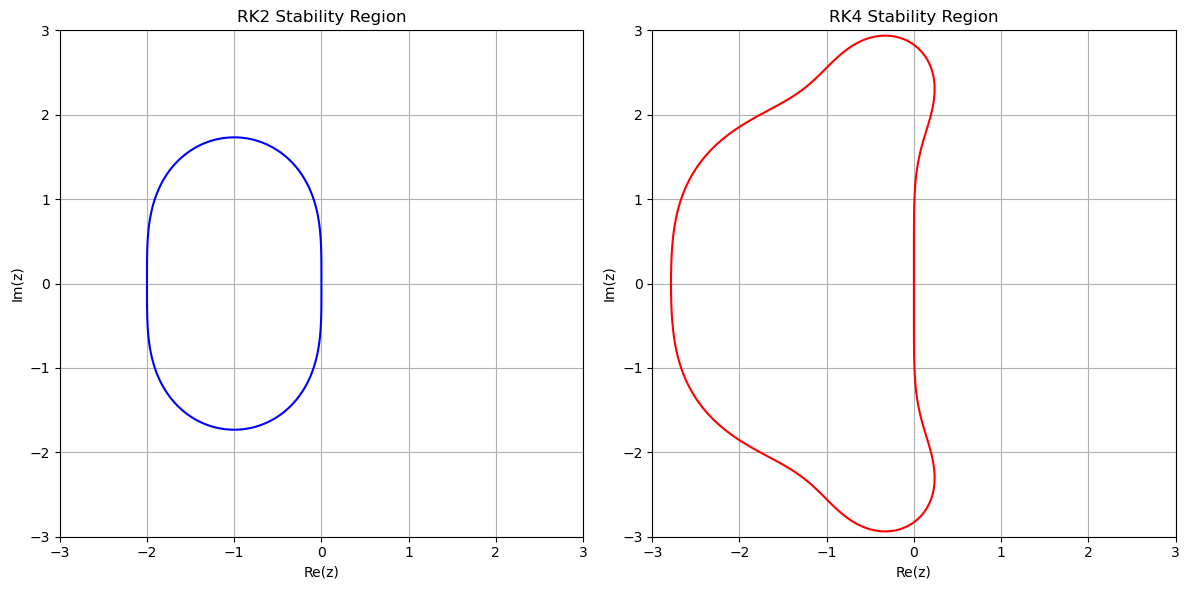

In [18]:
def R_rk2(z):
    return 1 + z + 0.5*z**2

def R_rk4(z):
    return 1 + z + 0.5*z**2 + (1/6)*z**3 + (1/24)*z**4

# Create grid in complex plane
x = np.linspace(-3,3,400)
y = np.linspace(-3,3,400)
X, Y = np.meshgrid(x, y)
Z  = X + 1j*Y

# Compute the function values
R_rk2_values = np.abs(R_rk2(Z))
R_rk4_values = np.abs(R_rk4(Z))

# Plot stability regions
plt.figure(figsize=(12, 6))

#RK2 stability region
plt.subplot(1, 2, 1)
plt.contour(X,Y,R_rk2_values, levels=[1], colors='blue')
plt.title('RK2 Stability Region')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid()

#RK4 stability region
plt.subplot(1, 2, 2)
plt.contour(X,Y,R_rk4_values, levels=[1], colors='red')
plt.title('RK4 Stability Region')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid()
plt.tight_layout()
plt.show()


A regularized model for impact in explicit dynamics applied to the split Hopkinson pressure bar DOI:10.1007/s00466-016-1311-1

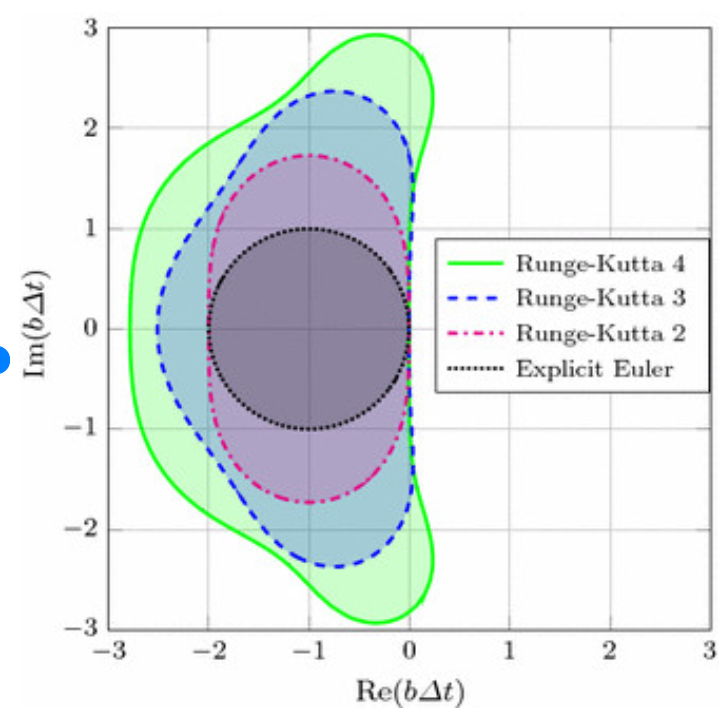